Import Library


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.optimizers import Adam

Load Dataset

In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/kucingku-capstone/machine-learning/main/dataset/clean_cats_dataset.csv')
df

,cat_id,type,age,gender,size,coat,breed,user_id,rating
0,46743754,Cat,Adult,Female,Medium,Short,Domestic Short Hair,12631,2.49
1,46750373,Cat,Baby,Female,Medium,Short,Domestic Short Hair,3747,4.40
2,46722526,Cat,Baby,Male,Small,Short,Domestic Short Hair,9182,2.11
3,46725832,Cat,Baby,Male,Medium,Short,Domestic Short Hair,1092,3.43
4,46728797,Cat,Baby,Female,Small,Short,Domestic Short Hair,8769,3.49
...,...,...,...,...,...,...,...,...,...
34683,41835694,Cat,Adult,Male,Medium,Hairless,Devon Rex,12417,3.72
34684,32014398,Cat,Young,Female,Medium,Short,Devon Rex,2488,3.00
34685,18561969,Cat,Adult,Female,Medium,Short,Devon Rex,1656,4.01
34686,24633479,Cat,Senior,Male,Large,Short,Devon Rex,3268,2.46


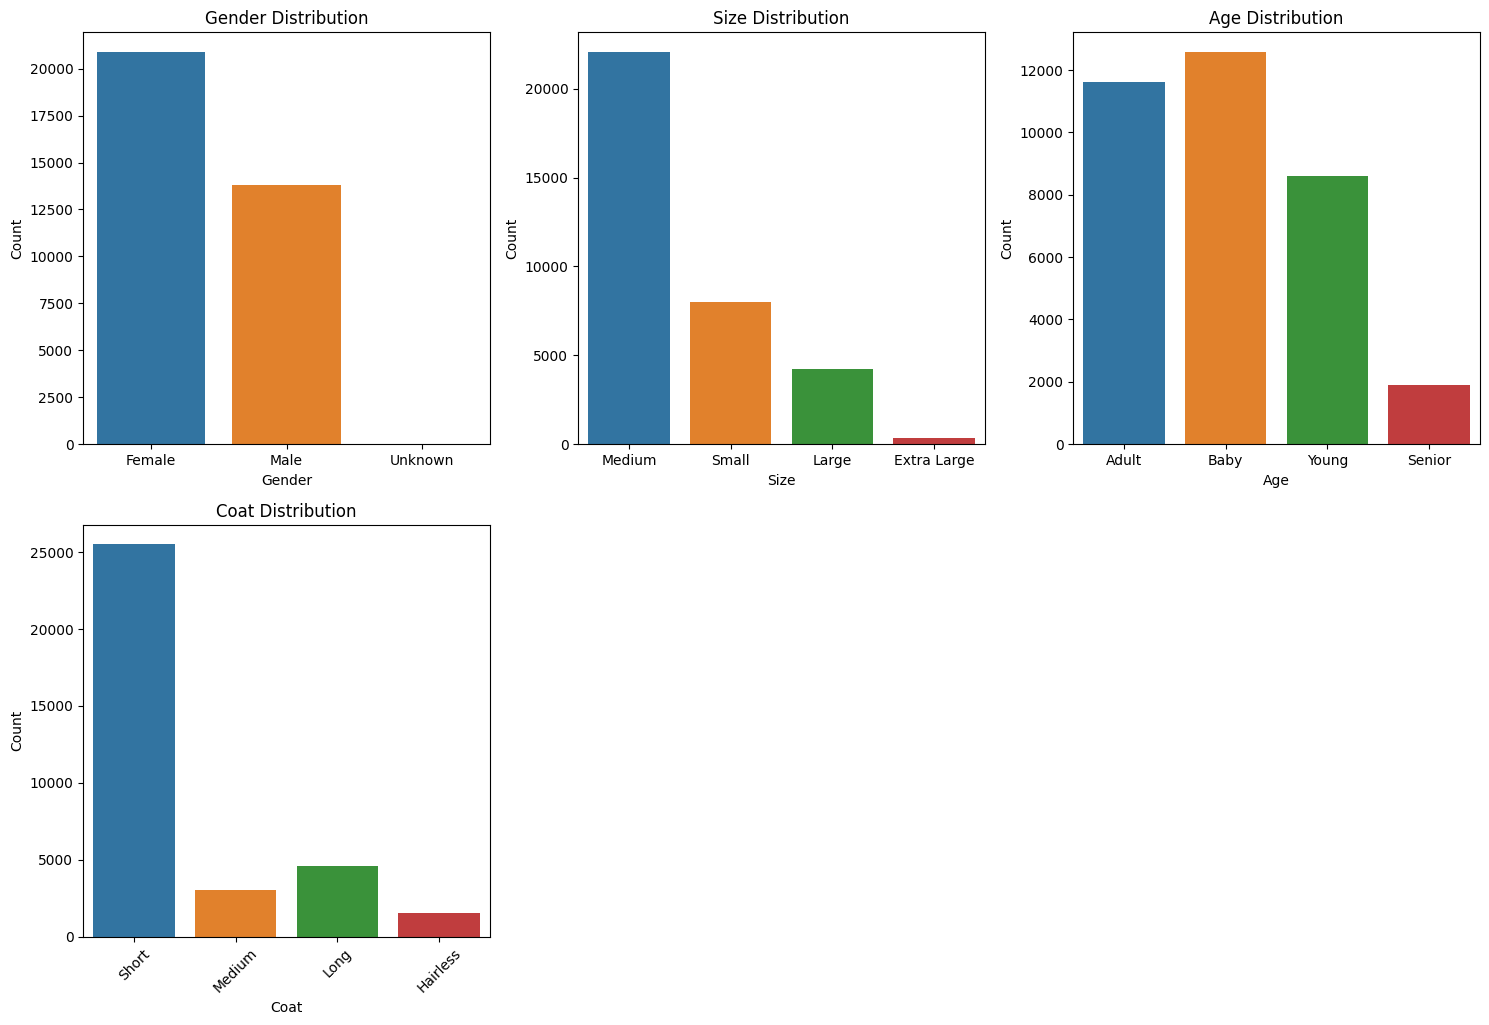

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize 4 main category in dateset
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
sns.countplot(x='size', data=df)
plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
sns.countplot(x='age', data=df)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 3, 4)
sns.countplot(x='coat', data=df)
plt.title('Coat Distribution')
plt.xlabel('Coat')
plt.ylabel('Count')

plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


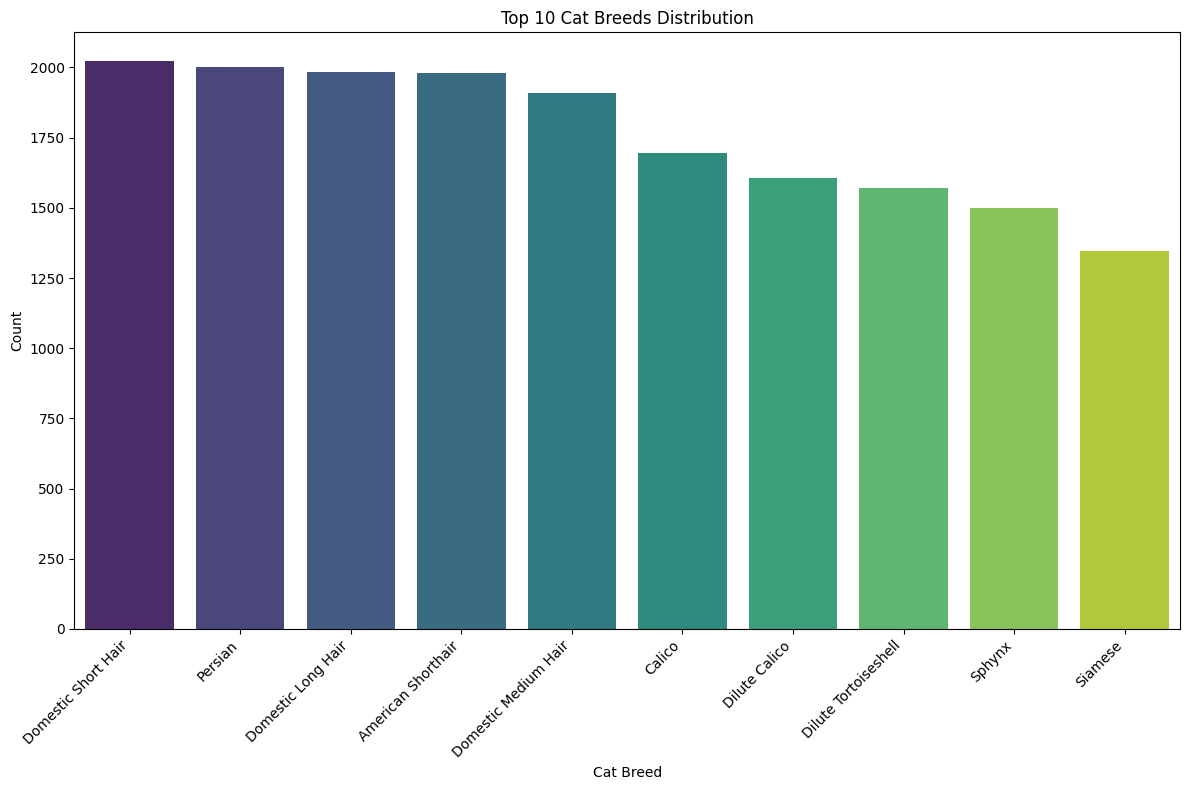

In [50]:
# Get the top N breeds for visualization (change N as needed)
top_n_breeds = 10
top_breeds = df['breed'].value_counts().nlargest(top_n_breeds).index

# Filter the dataframe for the top breeds
top_breeds_df = df[df['breed'].isin(top_breeds)]

# Visualize the distribution of the top N breeds
plt.figure(figsize=(12, 8))
sns.countplot(x='breed', data=top_breeds_df, order=top_breeds, palette='viridis')
plt.title(f'Top {top_n_breeds} Cat Breeds Distribution')
plt.xlabel('Cat Breed')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Data preprocessing

In [51]:
user_encoder = LabelEncoder()
cat_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
coat_encoder = LabelEncoder()
size_encoder = LabelEncoder()
age_encoder = LabelEncoder()

In [73]:
df['user_id'] = user_encoder.fit_transform(df['user_id'].astype(float))
df['cat_id'] = cat_encoder.fit_transform(df['cat_id'].astype(float))
df['gender'] = gender_encoder.fit_transform(df['gender'].astype(str)).astype(float)
df['coat'] = coat_encoder.fit_transform(df['coat'].astype(str)).astype(float)
df['size'] = size_encoder.fit_transform(df['size'].astype(str)).astype(float)
df['age'] = age_encoder.fit_transform(df['age'].astype(str)).astype(float)

df = df.drop(['coat', 'type'], axis=1)
df


,cat_id,age,gender,size,breed,user_id,rating
0,32429,0.0,0.0,2.0,Domestic Short Hair,12063,2.49
1,33042,1.0,0.0,2.0,Domestic Short Hair,3565,4.40
2,30669,1.0,1.0,3.0,Domestic Short Hair,8750,2.11
3,30926,1.0,1.0,2.0,Domestic Short Hair,1036,3.43
4,31121,1.0,0.0,3.0,Domestic Short Hair,8349,3.49
...,...,...,...,...,...,...,...
34683,13030,0.0,1.0,2.0,Devon Rex,11855,3.72
34684,5045,3.0,0.0,2.0,Devon Rex,2363,3.00
34685,173,0.0,0.0,2.0,Devon Rex,1572,4.01
34686,1364,2.0,1.0,1.0,Devon Rex,3102,2.46


### Split the dataset into training and testing

In [74]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

### Create the collaborative filtering model using TensorFlow

In [75]:
num_users = len(user_encoder.classes_)
num_cats = len(cat_encoder.classes_)
num_genders = len(gender_encoder.classes_)
num_sizes = len(size_encoder.classes_)
num_ages = len(age_encoder.classes_)

In [76]:
embedding_size = 50

In [77]:
# Define input layers
user_input = Input(shape=(1,), name='user_input')
cat_input = Input(shape=(1,), name='cat_input')
gender_input = Input(shape=(1,), name='gender_input')
size_input = Input(shape=(1,), name='size_input')
age_input = Input(shape=(1,), name='age_input')

In [78]:
# Define embedding layers
user_embedding = Embedding(input_dim=num_users, output_dim=embedding_size, input_length=1)(user_input)
cat_embedding = Embedding(input_dim=num_cats, output_dim=embedding_size, input_length=1)(cat_input)
gender_embedding = Embedding(input_dim=num_genders, output_dim=embedding_size, input_length=1)(gender_input)
size_embedding = Embedding(input_dim=num_sizes, output_dim=embedding_size, input_length=1)(size_input)
age_embedding = Embedding(input_dim=num_ages, output_dim=embedding_size, input_length=1)(age_input)


In [79]:
# Flatten the embeddings
user_embedding = Flatten()(user_embedding)
cat_embedding = Flatten()(cat_embedding)
gender_embedding = Flatten()(gender_embedding)
size_embedding = Flatten()(size_embedding)
age_embedding = Flatten()(age_embedding)

In [81]:
# Concatenate all embeddings
concatenated = Concatenate()([user_embedding, cat_embedding, gender_embedding, size_embedding, age_embedding])

In [82]:
# Add additional dense layers
dense_layer_1 = Dense(128, activation='relu')(concatenated)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
output = Dense(1)(dense_layer_2)

In [89]:
# Combine all layers into a model
model = Model(inputs=[user_input, cat_input, gender_input, size_input, age_input], outputs=output)

In [90]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [91]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 cat_input (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 gender_input (InputLayer)   [(None, 1)]                  0         []                            
                                                                                                  
 size_input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                            

In [92]:
# Train the model
history = model.fit(
    x=[train_df['user_id'], train_df['cat_id'], train_df['gender'], train_df['size'], train_df['age']],
    y=train_df['rating'],
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
347/347 [==============================] - 9s 23ms/step - loss: 1.4636 - val_loss: 0.8688
Epoch 2/10
347/347 [==============================] - 9s 25ms/step - loss: 0.4516 - val_loss: 0.9575
Epoch 3/10
347/347 [==============================] - 8s 24ms/step - loss: 0.2114 - val_loss: 0.9338
Epoch 4/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0655 - val_loss: 0.9236
Epoch 5/10
347/347 [==============================] - 8s 23ms/step - loss: 0.0432 - val_loss: 0.9168
Epoch 6/10
347/347 [==============================] - 8s 23ms/step - loss: 0.0304 - val_loss: 0.9102
Epoch 7/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0296 - val_loss: 0.9071
Epoch 8/10
347/347 [==============================] - 8s 23ms/step - loss: 0.0282 - val_loss: 0.9093
Epoch 9/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0275 - val_loss: 0.9077
Epoch 10/10
347/347 [==============================] - 8s 24ms/step - loss: 0.0288 - val_lo

In [94]:
# Evaluate the model on the test set
test_loss = model.evaluate(
    x=[test_df['user_id'], test_df['cat_id'], test_df['gender'], test_df['size'], test_df['age']],
    y=test_df['rating']
)

print(f'Test Loss: {test_loss}')

217/217 [==============================] - 0s 1ms/step - loss: 0.9147
Test Loss: 0.914716899394989


### Make predictions for a specific user

In [95]:
user_index_example = 0
user_input_example = np.array([user_index_example] * num_cats)

# Reshape input arrays for prediction
user_input_example = np.reshape(user_input_example, (num_cats, 1))

# Generate dummy indices for other features
cat_indices = np.arange(num_cats)
gender_indices = np.zeros_like(cat_indices)
size_indices = np.zeros_like(cat_indices)
age_indices = np.zeros_like(cat_indices)

# Predictions
predictions = model.predict([user_input_example, cat_indices, gender_indices, size_indices, age_indices])

# Get top recommendations
top_cat_indices = np.argsort(predictions.flatten())[::-1][:5]
top_cat_ids = cat_encoder.inverse_transform(top_cat_indices)

print(top_cat_ids)

1084/1084 [==============================] - 2s 1ms/step
[25984. 10442. 13108. 26464. 24582.]


### Save Model

In [96]:
model.save("CF_model_kucingku.h5")

C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Read Dataset Cat

In [97]:
import h5py

# Nama file H5 yang telah disimpan
file_path = "E:\machine-learning\model\model elo\CF_model_kucingku.h5"

# Membuka file H5
with h5py.File(file_path, 'r') as file:
    # Melihat struktur file H5
    def print_h5_item(name, obj):
        if isinstance(obj, h5py.Group):
            print(f"Group: {name}")
        elif isinstance(obj, h5py.Dataset):
            print(f"Dataset: {name}")

    file.visititems(print_h5_item)

Group: model_weights
Group: model_weights/age_input
Group: model_weights/cat_input
Group: model_weights/concatenate_2
Group: model_weights/dense_3
Group: model_weights/dense_3/dense_3
Dataset: model_weights/dense_3/dense_3/bias:0
Dataset: model_weights/dense_3/dense_3/kernel:0
Group: model_weights/dense_4
Group: model_weights/dense_4/dense_4
Dataset: model_weights/dense_4/dense_4/bias:0
Dataset: model_weights/dense_4/dense_4/kernel:0
Group: model_weights/dense_5
Group: model_weights/dense_5/dense_5
Dataset: model_weights/dense_5/dense_5/bias:0
Dataset: model_weights/dense_5/dense_5/kernel:0
Group: model_weights/embedding_12
Group: model_weights/embedding_12/embedding_12
Dataset: model_weights/embedding_12/embedding_12/embeddings:0
Group: model_weights/embedding_13
Group: model_weights/embedding_13/embedding_13
Dataset: model_weights/embedding_13/embedding_13/embeddings:0
Group: model_weights/embedding_14
Group: model_weights/embedding_14/embedding_14
Dataset: model_weights/embedding_14

In [99]:
from tensorflow.keras.models import load_model

# Load model yang telah disimpan
loaded_model = load_model("E:\machine-learning\model\model elo\CF_model_kucingku.h5")

# Evaluate the loaded model on the test set
test_loss = loaded_model.evaluate(
    x=[test_df['user_id'], test_df['cat_id'], test_df['gender'], test_df['size'], test_df['age']],
    y=test_df['rating'])
print(f'Test Loss: {test_loss}')

217/217 [==============================] - 0s 2ms/step - loss: 0.9147
Test Loss: 0.914716899394989


Uji Dataset KucingKu

In [100]:

# Load the Keras model
loaded_model = tf.keras.models.load_model("E:\machine-learning\model\model elo\CF_model_kucingku.h5")

# Convert the Keras model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open("collaborative_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmp1ok0ka6o\assets


INFO:tensorflow:Assets written to: C:\Users\USER\AppData\Local\Temp\tmp1ok0ka6o\assets
